Project Roadmap - Correlation Arbitrage System:
Phase 1: Discover Market Groups (Unsupervised Learning)

Use your correlation matrix to identify clusters of stocks that move together
Learn clustering algorithms (K-means, hierarchical clustering)
Validate that your groups actually represent meaningful market sectors

Phase 2: Detect Laggards (Feature Engineering + Supervised Learning)

For each group, identify when one stock is "behind" the others
Create features: relative performance, momentum indicators, deviation from group mean
Build a classifier: "Is this stock likely to catch up?"

Phase 3: Predict Catch-up Timing (Time Series Prediction)

Given a laggard stock, predict when/how much it will move
This is where your time series intuition comes in

Phase 4: Portfolio Strategy (Optimization)

Combine predictions into trading decisions
Position sizing, risk management

In [93]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler

In [94]:
#list of tickers to map
#ticker_list = ["NVDA","TSM","SHEL","COP"]
#ticker_list = ["AAPL", "NVDA", "GOOG", "MSFT","TSM","BA","ORCL","HCTI","PL","DAL","AAL","SHEL","COP","GME"]
ticker_list=["AAPL","MSFT","GOOGL","AMZN","NVDA","TSLA","META","TSM","NFLX","AVGO","AMD","QCOM","INTC","IBM","ORCL","CRM","ADBE","SAP","NOW","SHOP","JPM","BAC","WFC","C","GS","MS","SCHW","BLK","AXP","UNH","JNJ","PFE","MRK","LLY","ABBV","BMY","VRTX","REGN","GILD","KO","PEP","MCD","SBUX","YUM","WMT","TGT","COST","HD","LOW","PG","CL","KMB","UL","PM","MO","EL","LVMUY","NKE","LULU","XOM","CVX","COP","SHEL","BP","EOG","SLB","HAL","BKR","NEE","DUK","SO","D","AEP","EXC","ED","PCG","SRE","PEG","BA","LMT","NOC","RTX","GD","TDG","HON","GE","ETN","EMR","CSCO","PANW","FTNT","ZS","CRWD","DDOG","SNOW","MDB","PLTR","ZS","RCL","CCL","DAL","AAL","UAL","LYV","BKNG","ABNB","UBER","LYFT"]

In [95]:
#list dates to map for
start_date = "2010-01-01"
end_date = "2025-06-12"

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

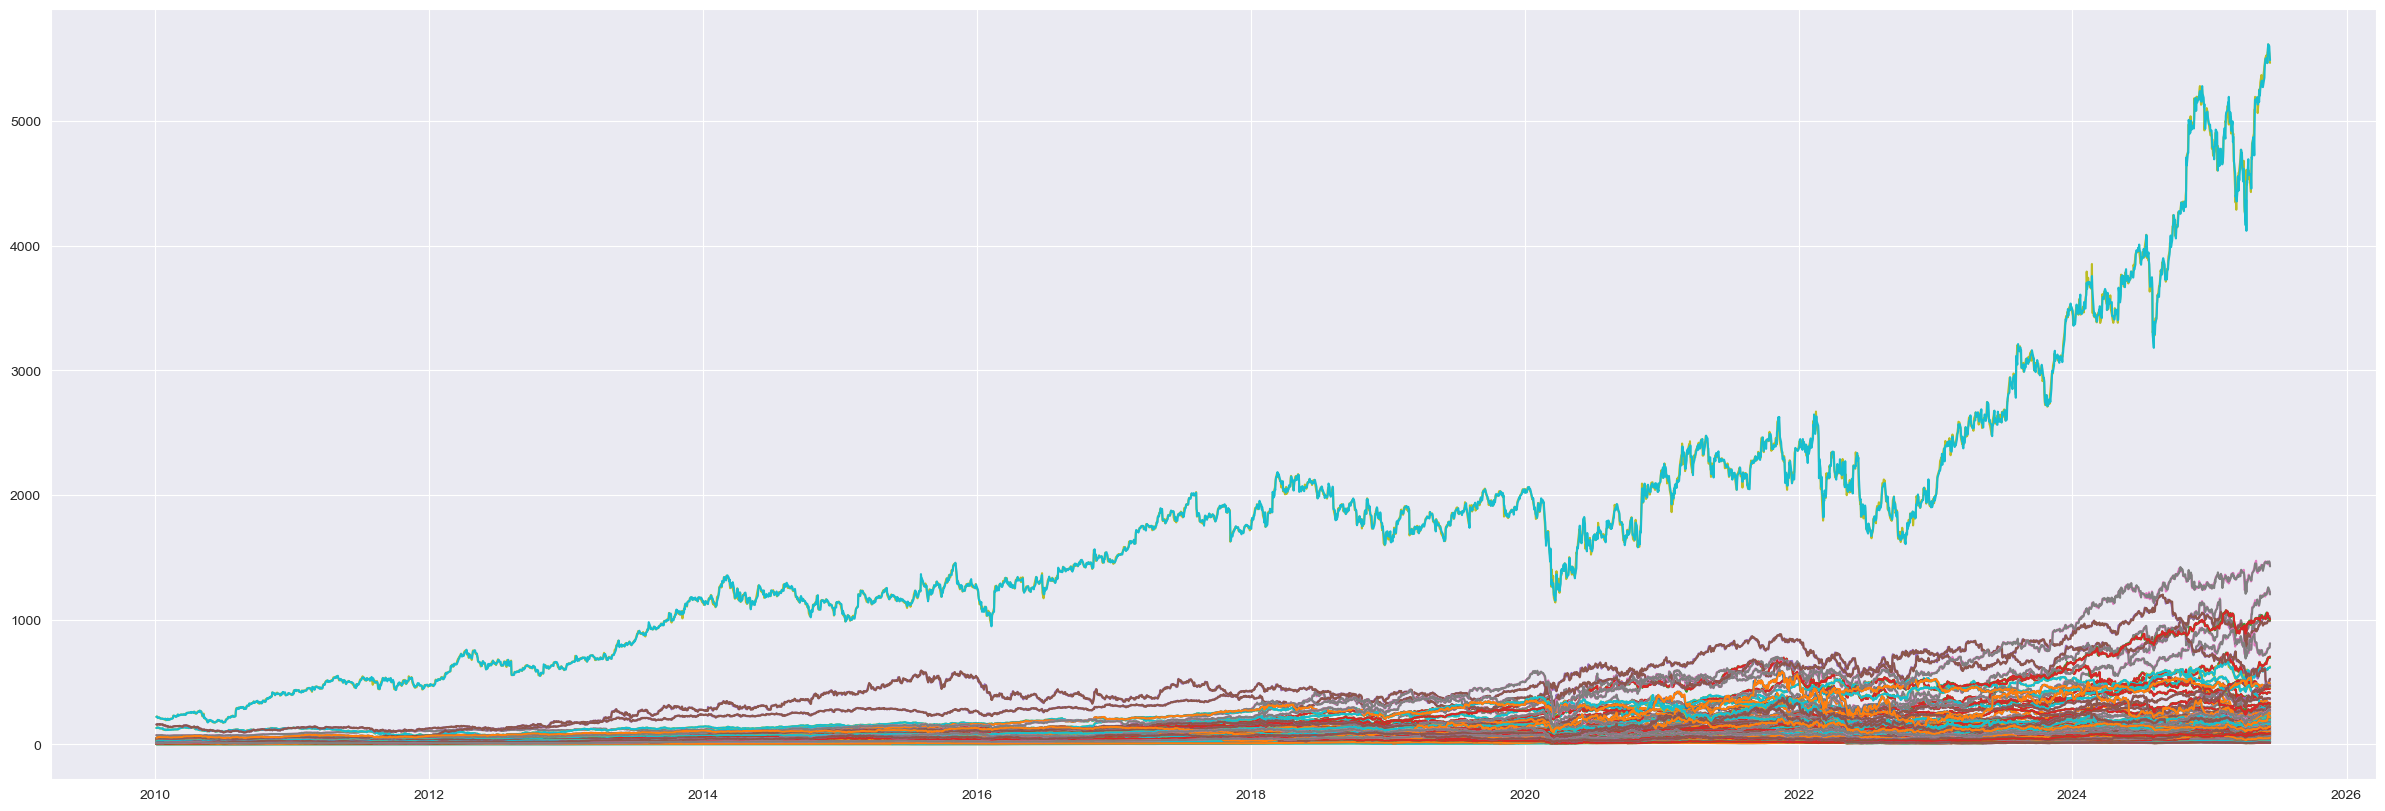

In [96]:
plt.figure(figsize=(30,10))
all_dict = {}

for ticker in ticker_list:
    try:
        ticker_data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)
    except:
        print("No data for ticker " + ticker)
    plt.plot(ticker_data.index, ticker_data['Close'], label=f"Close_{ticker}")
    plt.plot(ticker_data.index, ticker_data['Open'], label=f"Open_{ticker}")
    #plt.plot(ticker_data.index, ticker_data['High'], label=f"High_{ticker}")
    #plt.plot(ticker_data.index, ticker_data['Low'], label=f"Low_{ticker}")

    all_dict[ticker] = ticker_data
#plt.legend()
plt.grid(True)
plt.show()

C:\Users\nicko\AppData\Local\Temp\ipykernel_1500\3084185173.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_returns[name]=returns
C:\Users\nicko\AppData\Local\Temp\ipykernel_1500\3084185173.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_returns[name]=returns
C:\Users\nicko\AppData\Local\Temp\ipykernel_1500\3084185173.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.c

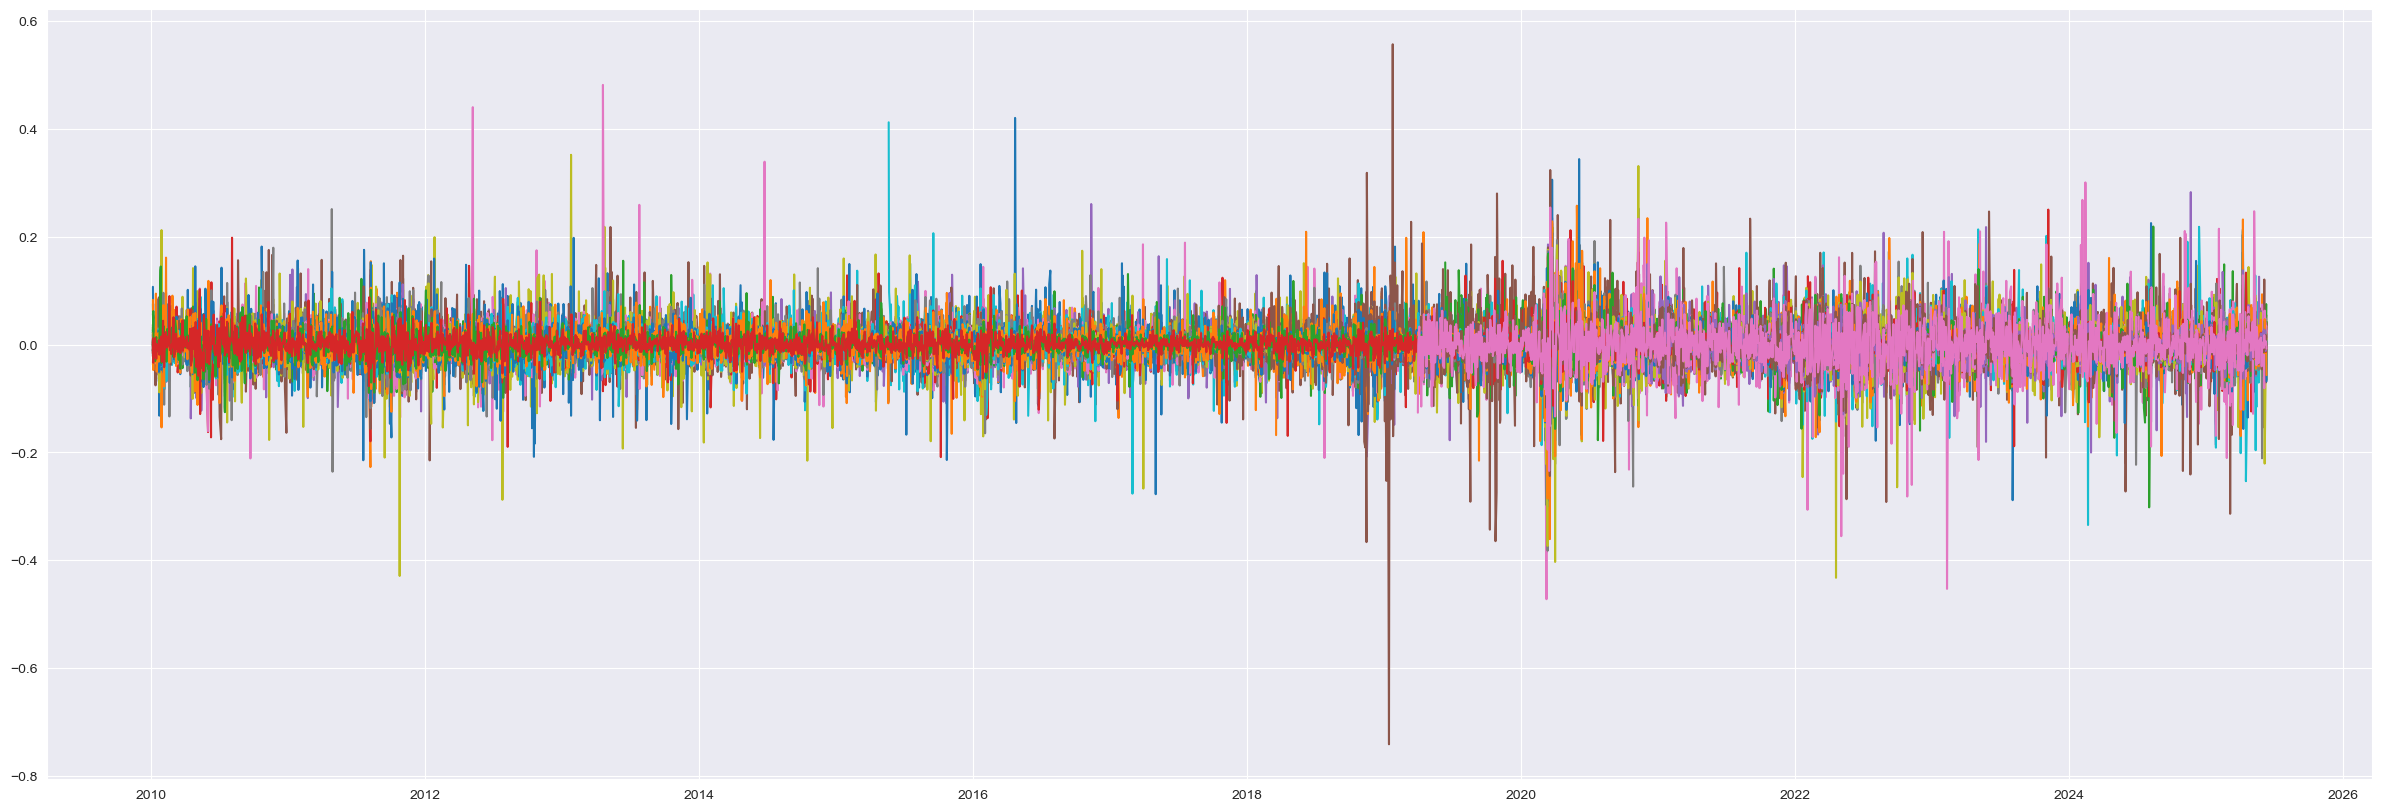

In [97]:
plt.figure(figsize=(30,10))
df_returns = pd.DataFrame()
for name in all_dict:
    returns = np.log(all_dict[name]['Close'] / all_dict[name]['Close'].shift(1))
    plt.plot(returns, label=name)
    df_returns[name]=returns
#for name in all_df:
#    returns = np.log((all_df[name]['Open'] / all_df[name]['Open'].shift(1)))+0.5
#    plt.plot(returns, label=name)

#plt.legend()
plt.grid(True)
plt.show()

In [98]:
correlation_matrix = (round(df_returns.corr(),5))
print(correlation_matrix)

          AAPL     MSFT    GOOGL     AMZN     NVDA     TSLA     META      TSM  \
AAPL   1.00000  0.59039  0.55130  0.49128  0.49045  0.37499  0.43830  0.46782   
MSFT   0.59039  1.00000  0.63711  0.57747  0.57205  0.36261  0.48491  0.50341   
GOOGL  0.55130  0.63711  1.00000  0.60295  0.50816  0.35100  0.54382  0.46893   
AMZN   0.49128  0.57747  0.60295  1.00000  0.47795  0.36887  0.52321  0.42286   
NVDA   0.49045  0.57205  0.50816  0.47795  1.00000  0.37988  0.43535  0.58727   
...        ...      ...      ...      ...      ...      ...      ...      ...   
LYV    0.36626  0.40795  0.39822  0.35566  0.37053  0.32739  0.31690  0.34891   
BKNG   0.40696  0.42494  0.47043  0.46259  0.39821  0.31151  0.35933  0.41072   
ABNB   0.43813  0.42589  0.41109  0.47749  0.46835  0.41487  0.42958  0.39782   
UBER   0.37189  0.40787  0.40851  0.41587  0.44505  0.37112  0.41824  0.38225   
LYFT   0.28770  0.31331  0.34289  0.33665  0.34623  0.32229  0.32462  0.31692   

          NFLX     AVGO  ..

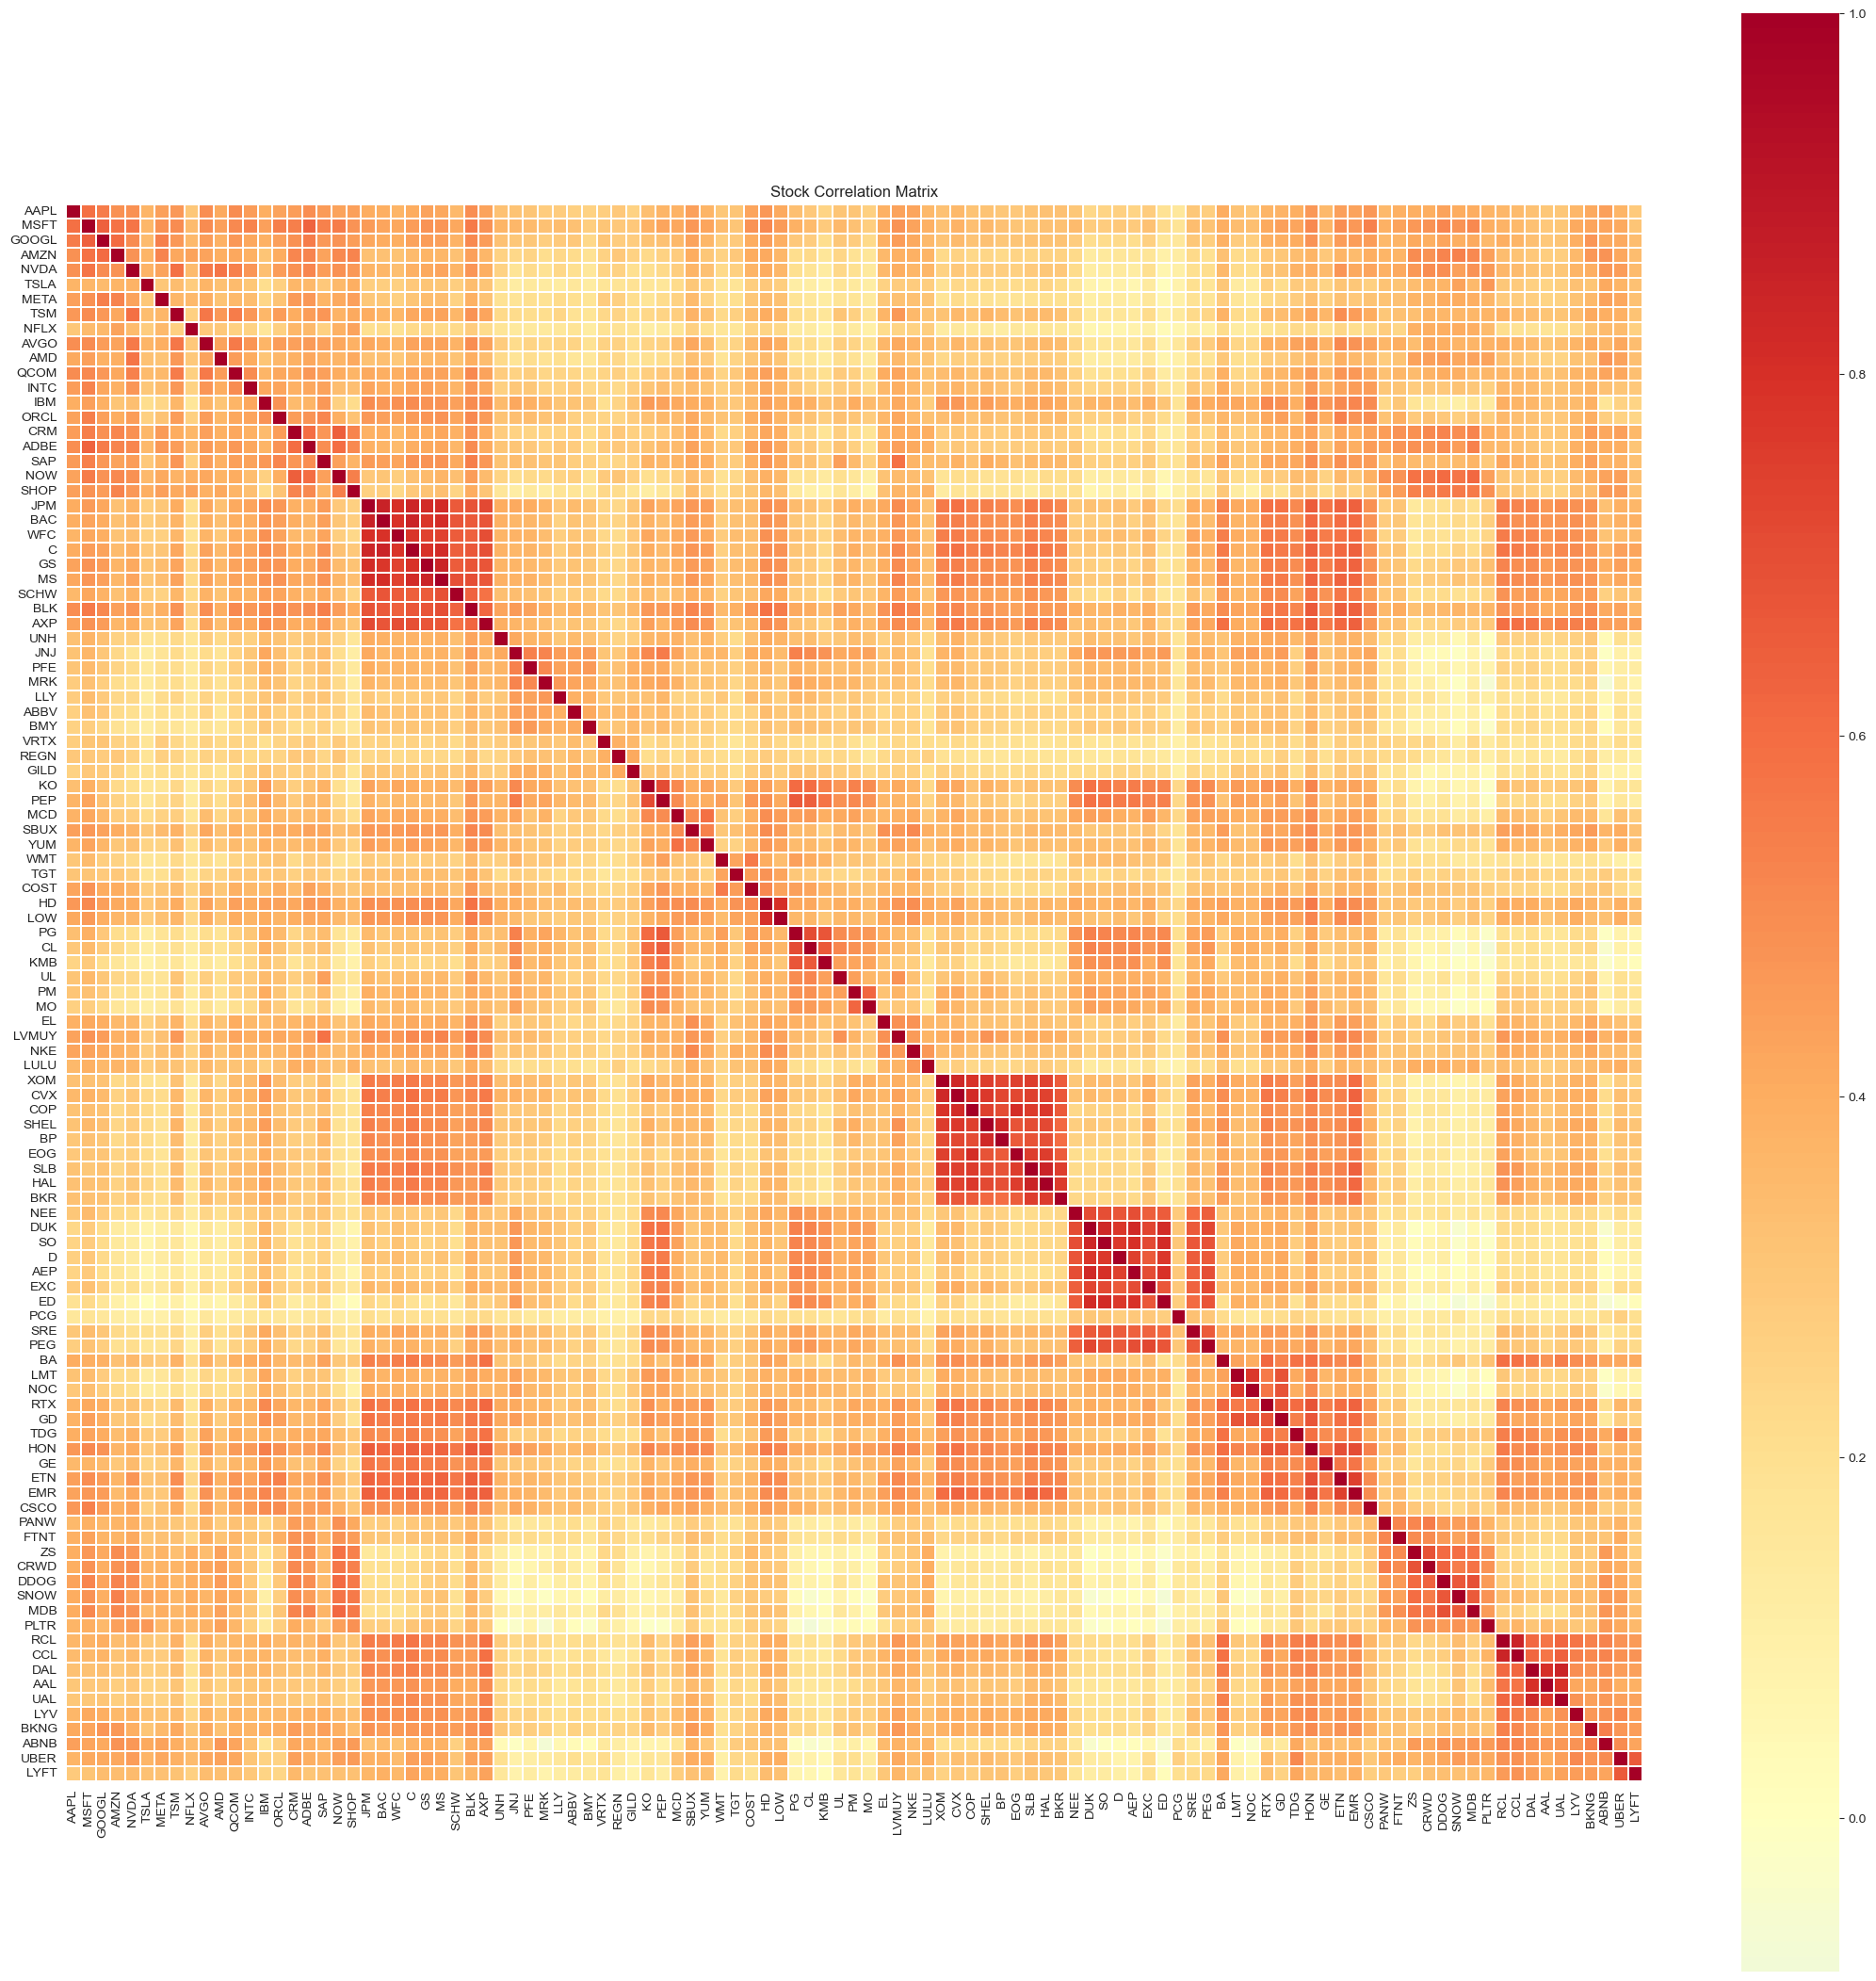

In [99]:
plt.figure(figsize=(round(len(correlation_matrix)/4), round(len(correlation_matrix)/4)))
sns.heatmap(correlation_matrix, annot=False,cmap='RdYlBu_r', center=0, square=True, linewidths=0.1)
plt.title('Stock Correlation Matrix')
plt.show()

In [100]:
# Start simple - find the "core" groups first
min_corr = 0.6
groups = []

# For each stock, see if it fits into an existing group
for stock in correlation_matrix.columns:
    placed = False

    # Check if this stock belongs to any existing group
    for group in groups:
        # If this stock correlates well with ANY stock already in the group
        if any(correlation_matrix.loc[stock, existing_stock] >= min_corr
               for existing_stock in group if existing_stock != stock):
            group.append(stock)
            placed = True
            break

    # If it doesn't fit anywhere, start a new group
    if not placed:
        groups.append([stock])

# Clean up - only keep groups with more than 1 stock
final_groups = [group for group in groups if len(group) > 3]

print(final_groups)
print(max(final_groups, key=len))

[['MSFT', 'GOOGL', 'AMZN', 'ADBE'], ['CRM', 'NOW', 'DDOG', 'SNOW', 'MDB'], ['JPM', 'BAC', 'WFC', 'C', 'GS', 'MS', 'SCHW', 'BLK', 'AXP', 'RTX', 'GD', 'TDG', 'HON', 'ETN', 'EMR'], ['KO', 'PEP', 'PG', 'CL', 'KMB'], ['XOM', 'CVX', 'COP', 'SHEL', 'BP', 'EOG', 'SLB', 'HAL', 'BKR'], ['NEE', 'DUK', 'SO', 'D', 'AEP', 'EXC', 'ED', 'SRE', 'PEG'], ['RCL', 'CCL', 'DAL', 'AAL', 'UAL']]
['JPM', 'BAC', 'WFC', 'C', 'GS', 'MS', 'SCHW', 'BLK', 'AXP', 'RTX', 'GD', 'TDG', 'HON', 'ETN', 'EMR']


In [101]:
def normalize_weighted_values(previous_weighted, today_return):
    """
    Normalize the weighted combination - can easily swap normalization methods
    """
    return (previous_weighted + today_return) / 2

# Let's build the weighted average calculation
def calculate_weighted_features(group_returns):
    """
    Calculate weighted historical average for each day
    Returns: DataFrame with weighted_avg and yesterday_return columns
    """
    # We'll fill this in together
    pass

In [102]:
#group prediction modal
# Find the largest group
largest_group = max(final_groups, key=len)
print(f"Largest group has {len(largest_group)} stocks: {largest_group}")

# Get the returns data for this group
group_stocks = largest_group
group_returns = df_returns[group_stocks].copy()

Largest group has 15 stocks: ['JPM', 'BAC', 'WFC', 'C', 'GS', 'MS', 'SCHW', 'BLK', 'AXP', 'RTX', 'GD', 'TDG', 'HON', 'ETN', 'EMR']


In [103]:
def build_group_prediction_data(group_stocks, returns_df, normalize_func):
    """
    Build training data for group prediction
    """
    # Calculate daily average returns for the group
    group_daily_returns = returns_df[group_stocks].mean(axis=1)

    # Lists to store our training data
    weighted_historical_features = []
    yesterday_return_features = []
    target_returns = []

    # Initialize the weighted historical value
    weighted_historical = 0
    prediction_error_avg=0
    # Start from day 1 (we need at least yesterday's data)
    for day in range(1, len(group_daily_returns)):
        # Yesterday's actual return
        yesterday_actual = group_daily_returns.iloc[day-1]

        # Update weighted historical: combine previous weighted history with yesterday's actual
        weighted_historical = normalize_func(weighted_historical, yesterday_actual)

        # Today's actual return (this is our target to predict)
        today_target = group_daily_returns.iloc[day]

        # Store this training example
        weighted_historical_features.append(weighted_historical)
        yesterday_return_features.append(yesterday_actual)
        target_returns.append(today_target)

        prediction_error = abs(yesterday_actual - today_target)
        #print(f"Day {day}: Yesterday: {yesterday_actual:.4f}, Today: {today_target:.4f}, Error: {prediction_error:.4f}")

        prediction_error_avg=(np.nansum(prediction_error)+prediction_error_avg)
    print(round(prediction_error_avg/len(group_daily_returns),5),group_stocks)

    return# weighted_historical_features, yesterday_return_features, target_returns

for num in range (0,len(final_groups)):
    group_returns = df_returns[final_groups[num]].copy()
    build_group_prediction_data(final_groups[num], group_returns, normalize_weighted_values)

0.01607 ['MSFT', 'GOOGL', 'AMZN', 'ADBE']
0.02562 ['CRM', 'NOW', 'DDOG', 'SNOW', 'MDB']
0.01442 ['JPM', 'BAC', 'WFC', 'C', 'GS', 'MS', 'SCHW', 'BLK', 'AXP', 'RTX', 'GD', 'TDG', 'HON', 'ETN', 'EMR']
0.0095 ['KO', 'PEP', 'PG', 'CL', 'KMB']
0.01777 ['XOM', 'CVX', 'COP', 'SHEL', 'BP', 'EOG', 'SLB', 'HAL', 'BKR']
0.01109 ['NEE', 'DUK', 'SO', 'D', 'AEP', 'EXC', 'ED', 'SRE', 'PEG']
0.02436 ['RCL', 'CCL', 'DAL', 'AAL', 'UAL']


In [104]:
def calculate_hedge_score(correlation_matrix, portfolio_weights=None):
    """
    Calculate a simple hedging score for a portfolio.

    Basic concept: A well-hedged portfolio has stocks that don't all move together.
    - High correlations = poor hedging (stocks move together)
    - Low/negative correlations = good hedging (stocks offset each other)

    Parameters:
    -----------
    correlation_matrix : pd.DataFrame
        Correlation matrix of stock returns (from your existing code)
    portfolio_weights : dict, optional
        Dictionary like {'AAPL': 0.3, 'NVDA': 0.2, ...}
        If None, assumes equal weights for all stocks

    Returns:
    --------
    dict : Simple hedging metrics
    """

    # If no weights provided, use equal weights
    if portfolio_weights is None:
        stocks = correlation_matrix.columns.tolist()
        portfolio_weights = {stock: round(1.0/len(stocks),3) for stock in stocks}

    # Make sure we only use stocks that exist in both
    stocks_in_portfolio = [stock for stock in portfolio_weights.keys()
                          if stock in correlation_matrix.columns]

    total_correlation = 0
    pair_count = 0

    # Look at all pairs of stocks in the portfolio
    for i, stock1 in enumerate(stocks_in_portfolio):
        for j, stock2 in enumerate(stocks_in_portfolio):
            if i < j:  # Don't double-count pairs
                # Get correlation between these two stocks
                correlation = correlation_matrix.loc[stock1, stock2]

                # Weight this correlation by how much of each stock we own
                weight1 = portfolio_weights[stock1]
                weight2 = portfolio_weights[stock2]
                weighted_correlation = correlation * weight1 * weight2

                total_correlation += weighted_correlation
                pair_count += weight1 * weight2

    # Average correlation (weighted by portfolio positions)
    if pair_count > 0:
        average_correlation = total_correlation / pair_count
    else:
        average_correlation = 0

    # Convert to hedge score (0-100 scale)
    # Higher score = better hedged
    # Logic: Low correlation = good hedging
    hedge_score = (1 - average_correlation) * 50 + 50

    return {
        'hedge_score': round(hedge_score, 1),
        'average_correlation': round(average_correlation, 3),
        'portfolio_size': len(stocks_in_portfolio)
    }

In [105]:
# Evaluate default equal weights as well
calculate_hedge_score(correlation_matrix, portfolio_weights=None)

# Function to generate random portfolio weights
def random_portfolio_weights(symbols):
    weights = np.random.dirichlet(np.ones(len(symbols)), size=1)[0]
    return {symbols[i]: float(round(weights[i], 3)) for i in range(len(symbols))}

# Run 100 simulations
hedge_scores = []

for _ in range(100):
    random_weights = random_portfolio_weights(correlation_matrix.index)
    result = calculate_hedge_score(correlation_matrix, portfolio_weights=random_weights)
    hedge_scores.append({'weights': random_weights, 'score': result['hedge_score']})

best_portfolio = max(hedge_scores, key=lambda x: x['score'])
print("Best Hedge Score:", best_portfolio['score'])
print("Portfolio Weights:", best_portfolio['weights'])

Best Hedge Score: 85.2
Portfolio Weights: {'AAPL': 0.001, 'MSFT': 0.009, 'GOOGL': 0.001, 'AMZN': 0.035, 'NVDA': 0.015, 'TSLA': 0.001, 'META': 0.014, 'TSM': 0.025, 'NFLX': 0.021, 'AVGO': 0.003, 'AMD': 0.007, 'QCOM': 0.015, 'INTC': 0.004, 'IBM': 0.002, 'ORCL': 0.028, 'CRM': 0.003, 'ADBE': 0.006, 'SAP': 0.001, 'NOW': 0.042, 'SHOP': 0.0, 'JPM': 0.006, 'BAC': 0.001, 'WFC': 0.004, 'C': 0.006, 'GS': 0.003, 'MS': 0.007, 'SCHW': 0.002, 'BLK': 0.007, 'AXP': 0.001, 'UNH': 0.003, 'JNJ': 0.018, 'PFE': 0.002, 'MRK': 0.004, 'LLY': 0.02, 'ABBV': 0.001, 'BMY': 0.033, 'VRTX': 0.016, 'REGN': 0.022, 'GILD': 0.014, 'KO': 0.012, 'PEP': 0.011, 'MCD': 0.001, 'SBUX': 0.003, 'YUM': 0.004, 'WMT': 0.01, 'TGT': 0.005, 'COST': 0.032, 'HD': 0.002, 'LOW': 0.001, 'PG': 0.01, 'CL': 0.018, 'KMB': 0.026, 'UL': 0.01, 'PM': 0.007, 'MO': 0.007, 'EL': 0.002, 'LVMUY': 0.001, 'NKE': 0.002, 'LULU': 0.018, 'XOM': 0.005, 'CVX': 0.001, 'COP': 0.008, 'SHEL': 0.005, 'BP': 0.004, 'EOG': 0.008, 'SLB': 0.024, 'HAL': 0.004, 'BKR': 0.003